# Analysing Genshin Impact's Wish System Drop Rates Using Data-Driven Approach

## Libraries Used

In [1]:
import json
import requests as req
import matplotlib.pyplot as plt

## Dataset - Paimon.moe API

The dataset is taken from Paimon.moe's API. For the full documentation of Paimon.moe API, refer to this [GitHub repostory](https://github.com/MadeBaruna/paimon-moe).

The banner IDs are listed as below:
1. Standard banner = six digit ID starting with 2
2. Character event banners = six digit ID starting with 3
3. Weapon event banners = six digit ID starting with 4
4. Chronicled Wish = six digit ID starting with 5

In [2]:
# Standard banner (Wanderlust Invocation) as an example
banner_id = 200001
response = req.get(f"https://api.paimon.moe/wish?banner={banner_id}")
print(json.dumps(response.json(), indent=4))

{
    "time": "2025-05-27T10:58:27+00:00",
    "list": [
        {
            "name": "amber",
            "type": "character",
            "count": 980701,
            "guaranteed": 0
        },
        {
            "name": "amos_bow",
            "type": "weapon",
            "count": 287775,
            "guaranteed": 0
        },
        {
            "name": "aquila_favonia",
            "type": "weapon",
            "count": 284693,
            "guaranteed": 0
        },
        {
            "name": "barbara",
            "type": "character",
            "count": 981553,
            "guaranteed": 0
        },
        {
            "name": "beidou",
            "type": "character",
            "count": 981427,
            "guaranteed": 0
        },
        {
            "name": "bennett",
            "type": "character",
            "count": 984564,
            "guaranteed": 0
        },
        {
            "name": "candace",
            "type": "character",
            "count

## Pre-Processing - Data Filtering

In this section we filter the data needed: banner ID, banner type, four-star pity values and five-star pity values. The filtered data will then be saved in CSV and JSON file formats (can be accessed in our [GitHub repository](https://github.com/MsExcel85/genshin-drop-rate)).

In [3]:
banners_data = []
data = response.json()

pity = data.get("pityCount", {})
four_star = pity.get("rare", [])[:10]
five_star = pity.get("legendary", [])[1:91]

four_star = four_star + ([None] * (10 - len(four_star)))     # Four-star item guarantee every 10 wishes
five_star = five_star + ([None] * (90 - len(five_star)))     # Five-star item guarantee every 90 wishes

banner_data = {
    "banner_id": banner_id,
    "banner_type": "standard"
}

banner_data.update({f"4star_pity{i+1}": four_star[i] for i in range(10)})
banner_data.update({f"5star_pity{i+1}": five_star[i] for i in range(90)})

banners_data.append(banner_data)
print(json.dumps(banners_data, indent=4))

[
    {
        "banner_id": 200001,
        "banner_type": "standard",
        "4star_pity1": 2835598,
        "4star_pity2": 2678706,
        "4star_pity3": 2531027,
        "4star_pity4": 2379882,
        "4star_pity5": 2241850,
        "4star_pity6": 2115668,
        "4star_pity7": 1991758,
        "4star_pity8": 1881435,
        "4star_pity9": 17361154,
        "4star_pity10": 13276597,
        "5star_pity1": 66110,
        "5star_pity2": 66559,
        "5star_pity3": 66758,
        "5star_pity4": 66520,
        "5star_pity5": 65796,
        "5star_pity6": 65501,
        "5star_pity7": 65110,
        "5star_pity8": 64328,
        "5star_pity9": 63880,
        "5star_pity10": 63376,
        "5star_pity11": 63120,
        "5star_pity12": 62387,
        "5star_pity13": 61626,
        "5star_pity14": 61385,
        "5star_pity15": 61078,
        "5star_pity16": 60119,
        "5star_pity17": 59989,
        "5star_pity18": 59120,
        "5star_pity19": 59083,
        "5star_pity20": 5

## Four-Star Items

There are three plots we're trying to calculate: official drop rates, empirical probability and conditional probability.

1. Official drop rates remain steady throughout the entire pity count, except for hard pity (100.0% guarantee)

2. Empirical probability is the number of times a four-star item is get at a certain pity value divided by the total number of wishes.

3. Conditional probability is the probability of  four-star item is obtained at a certain pity value given that no four-star item is obtained in previous pulls.

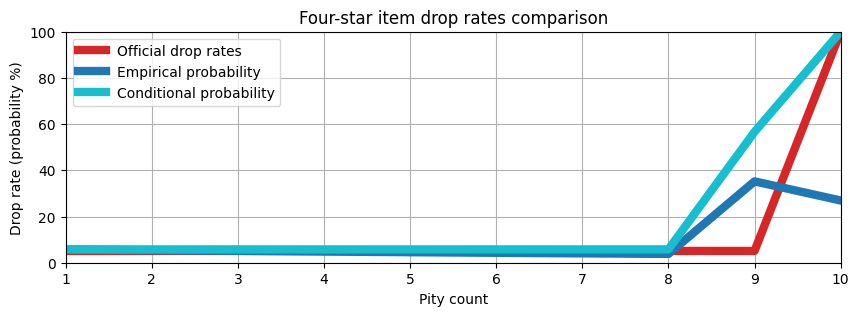

In [4]:
# Official drop rates (uniform probability distribution)
four_star_official_rates = ([5.1] * 9 ) + [100.0]
max_pity = 10

# Empirical probability
banner = banners_data[0]
four_star_pity_values = [banner[f"4star_pity{i}"] for i in range(1, max_pity + 1) if banner.get(f"4star_pity{i}") is not None]
four_star_empirical_rates = [i / sum(four_star_pity_values) * 100 for i in four_star_pity_values]

# Coditional probability
four_star_conditional_rates = []
cumulative = 0
for i in four_star_pity_values:
    four_star_conditional_rates.append(i / (sum(four_star_pity_values) - cumulative) * 100)
    cumulative = cumulative + i
    
# Visualizing the rates comparison
plt.figure(figsize=(10, 3))
plt.plot(range(1, max_pity + 1), four_star_official_rates, color="#D62728", label="Official drop rates", linewidth=6)
plt.plot(range(1, max_pity + 1), four_star_empirical_rates, color="#1F77B4", label="Empirical probability", linewidth=6)
plt.plot(range(1, max_pity + 1), four_star_conditional_rates, color="#17BECF", label="Conditional probability", linewidth=6)
plt.xlim(1, max_pity)
plt.xlabel("Pity count")
plt.ylim(0, 100)
plt.ylabel("Drop rate (probability %)")
plt.title("Four-star item drop rates comparison")
plt.legend()
plt.grid()
plt.show()

## Five-Star Items

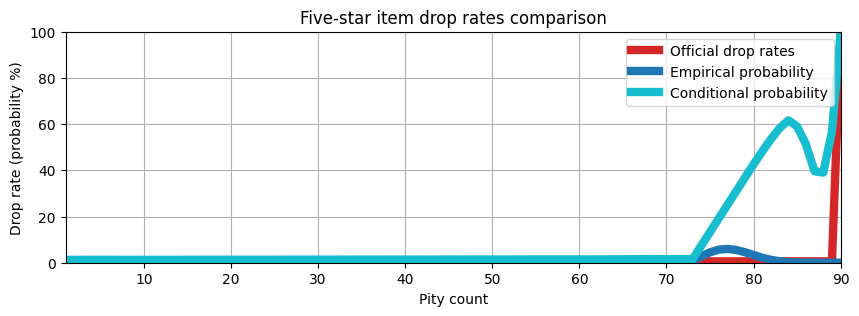

In [5]:
# Official drop rates (uniform probability distribution)
five_star_official_rates = ([0.6] * 89 ) + [100.0]
max_pity = 90

# Empirical probability
banner = banners_data[0]
five_star_pity_values = [banner[f"5star_pity{i}"] for i in range(1, max_pity + 1) if banner.get(f"5star_pity{i}") is not None]
five_star_empirical_rates = [i / sum(five_star_pity_values) * 100 for i in five_star_pity_values]

# Coditional probability
five_star_conditional_rates = []
cumulative = 0
for i in five_star_pity_values:
    five_star_conditional_rates.append(i / (sum(five_star_pity_values) - cumulative) * 100)
    cumulative = cumulative + i
    
# Visualizing the rates comparison
plt.figure(figsize=(10, 3))
plt.plot(range(1, max_pity + 1), five_star_official_rates, color="#D62728", label="Official drop rates", linewidth=6)
plt.plot(range(1, max_pity + 1), five_star_empirical_rates, color="#1F77B4", label="Empirical probability", linewidth=6)
plt.plot(range(1, max_pity + 1), five_star_conditional_rates, color="#17BECF", label="Conditional probability", linewidth=6)
plt.xlim(1, max_pity)
plt.xlabel("Pity count")
plt.ylim(0, 100)
plt.ylabel("Drop rate (probability %)")
plt.title("Five-star item drop rates comparison")
plt.legend()
plt.grid()
plt.show()